# Instalación paquete para fortran

Estudiante: Samuel Ricardo Salgado Rivera
Este notebook es tomado de https://github.com/ssanderson/pydata-toolbox 

In [18]:
pip install -U fortran-magic

In [19]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [20]:
import py_compile

# Inicio del notebook de Scott Sanderson

In [21]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [22]:
# ssalgado
jan2019 = pd.to_datetime(['2019-01-03 00:00:00+00:00',
 '2019-01-04 00:00:00+00:00',
 '2019-01-05 00:00:00+00:00',
 '2019-01-06 00:00:00+00:00',
 '2019-01-09 00:00:00+00:00',
 '2019-01-10 00:00:00+00:00',
 '2019-01-11 00:00:00+00:00',
 '2019-01-12 00:00:00+00:00',
 '2019-01-13 00:00:00+00:00',
 '2019-01-17 00:00:00+00:00',
 '2019-01-18 00:00:00+00:00',
 '2019-01-19 00:00:00+00:00',
 '2019-01-20 00:00:00+00:00',
 '2019-01-23 00:00:00+00:00',
 '2019-01-24 00:00:00+00:00',
 '2019-01-25 00:00:00+00:00',
 '2019-01-26 00:00:00+00:00',
 '2019-01-27 00:00:00+00:00',
 '2019-01-30 00:00:00+00:00',
 '2019-01-31 00:00:00+00:00',
 '2019-02-01 00:00:00+00:00'])
calendar19 = jan2019.values.astype('datetime64[D]')

event_dates19 = pd.to_datetime(['2019-01-06 00:00:00+00:00', 
                             '2019-01-07 00:00:00+00:00', 
                             '2019-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values19 = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [23]:
assert ran_the_first_cell, "Oh noes!"

In [24]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [25]:
# ssalgado
l_2 = [9, 'ocho', 7.0, 6, 5.0, "cuatro"]
l_2

[9, 'ocho', 7.0, 6, 5.0, 'cuatro']

In [26]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [27]:
# ssalgado
primero = l_2[0]
tercero = l_2[2]
print("primero: ", primero)
print("tercero: ", tercero)

primero:  9
tercero:  7.0


In [28]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [29]:
# ssalgado 
ultimo = l_2[-1]
penultimo = l_2[-2]
print("ultimo:", ultimo)
print("penultimo:", penultimo)

ultimo: cuatro
penultimo: 5.0


In [30]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [31]:
# ssalgado
sublista = l_2[1:4]
sublista

['ocho', 7.0, 6]

In [32]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [33]:
# ssalgado
primeros_cuatro = l_2[:4]
primeros_cuatro

[9, 'ocho', 7.0, 6]

In [34]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [35]:
# ssalgado
despues_cuatro = l_2[4:]
despues_cuatro

[5.0, 'cuatro']

In [36]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [37]:
# ssalgado
l_2 = ['i', 'j', 'k', 'l', 'm', 'n', 'o', 'p']
l_2[0:7:3]

['i', 'l', 'o']

In [38]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [39]:
# ssalgado
l_2[::-2]

['p', 'n', 'l', 'j']

In [40]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [41]:
# ssalgado
l_2 = [9, 8, 7, 6, 5]
print("Antes:", l_2)
l_2.append('cuatro')
print("Despues:", l_2)

Antes: [9, 8, 7, 6, 5]
Despues: [9, 8, 7, 6, 5, 'cuatro']


In [42]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [43]:
# ssalgado
l_2 = [9,8,7,6,5]
[x * 3 for x in l_2]

[27, 24, 21, 18, 15]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [44]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [45]:
#ssalgado
sportmen = {'Federer': 'Roger', 'Jordan': 'Michael', 'Bolt': 'Usain'}
sportmen

{'Bolt': 'Usain', 'Federer': 'Roger', 'Jordan': 'Michael'}

In [46]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [47]:
#ssalgado
sportmen['Drogba'] = 'Didier'
sportmen

{'Bolt': 'Usain', 'Drogba': 'Didier', 'Federer': 'Roger', 'Jordan': 'Michael'}

In [48]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [49]:
# ssalgado
del sportmen['Bolt']
sportmen

{'Drogba': 'Didier', 'Federer': 'Roger', 'Jordan': 'Michael'}

In [50]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [51]:
# ssalgado
# No slicing.
sportmen['Federer':'Michael'] 

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [52]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [53]:
# ssalgado
c = [[3, 2, 1],
     [4, 3, 2],
     [2, 2, 2],
     [5, 1, 5]]

d = [[1, 2, 2, 1],
     [2, 4, 6, 8]]

In [54]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [55]:
%%time

matmul(a, b)

CPU times: user 35 µs, sys: 6 µs, total: 41 µs
Wall time: 45.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [56]:
matmul(b, a)

[[24, 30, 36], [33, 42, 51]]

In [57]:
# ssalgado
%%time

matmul(c, d)

CPU times: user 82 µs, sys: 0 ns, total: 82 µs
Wall time: 116 µs


[[7, 14, 18, 19], [10, 20, 26, 28], [6, 12, 16, 18], [7, 14, 16, 13]]

In [58]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.8701664214470044, 0.853681513906203, 0.48111118708149303],
 [0.965032025978821, 0.9660599619617871, 0.24063515330804008]]

In [59]:
# ssalgado
randm2 = random_matrix(2, 3)

In [60]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 11.2 s, sys: 21.6 ms, total: 11.2 s
Wall time: 11.3 s


In [61]:
# ssalgado
%%time
randc = random_matrix(350, 200)
randd = random_matrix(200, 350)
y = matmul(randc, randd)

CPU times: user 7.22 s, sys: 16.5 ms, total: 7.23 s
Wall time: 7.24 s


In [62]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [63]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [64]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [65]:
# ssalgado
list_datos = [float((i*2)%100000) for i in range(100000)]
array_datos = np.array(list_datos)

In [66]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.3 ms, sys: 0 ns, total: 12.3 ms
Wall time: 14.5 ms


333328333350000.0

In [67]:
# ssalgado
%%time
python_dot_product(list_datos, list_datos)

CPU times: user 13 ms, sys: 0 ns, total: 13 ms
Wall time: 13.8 ms


333323333400000.0

In [68]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 170 µs, sys: 0 ns, total: 170 µs
Wall time: 198 µs


333328333350000.0

In [69]:
# ssalgado
%%time
fortran_dot_product(array_datos, array_datos)

CPU times: user 146 µs, sys: 10 µs, total: 156 µs
Wall time: 163 µs


333323333400000.0

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [70]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [71]:
# ssalgado
mul_elemwise([4, 3, 2, 1], [1+0j, 1.0, 4, 'tres'])

[(4+0j), 3.0, 8, 'tres']

In [72]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [73]:
# ssalgado
source_codigo = 'd * e + f'
bytecodigo = compile(source_codigo, '', 'eval')
dis.dis(bytecodigo)

  1           0 LOAD_NAME                0 (d)
              2 LOAD_NAME                1 (e)
              4 BINARY_MULTIPLY
              6 LOAD_NAME                2 (f)
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [74]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [75]:
# ssalgado
datos = np.array([2, 4, 6, 8])
datos

array([2, 4, 6, 8])

In [76]:
data + data

array([2, 4, 6, 8])

In [77]:
# ssalgado
datos + datos

array([ 4,  8, 12, 16])

In [78]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 471 µs, total: 471 µs
Wall time: 759 µs


333328333350000.0

In [79]:
# ssalgado
%%time
(array_datos * array_datos).sum()

CPU times: user 313 µs, sys: 0 ns, total: 313 µs
Wall time: 339 µs


333323333400000.0

In [80]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 211 µs, sys: 3.98 ms, total: 4.19 ms
Wall time: 5.01 ms


333328333350000.0

In [81]:
# ssalgado
%%time
array_datos.dot(array_datos)

CPU times: user 0 ns, sys: 771 µs, total: 771 µs
Wall time: 928 µs


333323333400000.0

In [82]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 595 µs, total: 595 µs
Wall time: 676 µs


333328333350000.0

In [83]:
# ssalgado
%%time
fortran_dot_product(array_datos, array_datos)

CPU times: user 135 µs, sys: 10 µs, total: 145 µs
Wall time: 152 µs


333323333400000.0

In [84]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [85]:
# ssalgado
datos[2] = 'qsda'

ValueError: ignored

In [86]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# ssalgado
datos.append(4)

In [87]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [88]:
# ssalgado
dos_por_dos = datos.reshape(2, 2)
dos_por_dos

array([[2, 4],
       [6, 8]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [89]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [90]:
#ssalgado
array = np.array([2, 4, 6, 8, 10, 12], dtype='int16').reshape(2, 3)
print("Mi array:\n", array, sep='')
print("-+-+-+-+-+-+-+")
print("DType:", array.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Mi array:
[[ 2  4  6]
 [ 8 10 12]]
-+-+-+-+-+-+-+
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [91]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [92]:
# ssalgado
datos = np.arange(16).reshape(4, 4)
datos

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [93]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [94]:
# ssalgado
datos * datos

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121],
       [144, 169, 196, 225]])

In [95]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [96]:
# ssalgado
np.cos(datos)

array([[ 1.        ,  0.54030231, -0.41614684, -0.9899925 ],
       [-0.65364362,  0.28366219,  0.96017029,  0.75390225],
       [-0.14550003, -0.91113026, -0.83907153,  0.0044257 ],
       [ 0.84385396,  0.90744678,  0.13673722, -0.75968791]])

In [97]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [98]:
# ssalgado
(datos % 5) == 0

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [99]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [100]:
# ssalgado
((datos % 3) == 0) & ((datos % 4) == 0)

array([[ True, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [ True, False, False, False]])

In [101]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [102]:
# ssalgado
datos @ datos.T

array([[ 14,  38,  62,  86],
       [ 38, 126, 214, 302],
       [ 62, 214, 366, 518],
       [ 86, 302, 518, 734]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [103]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [104]:
# ssalgado
senos = np.sin(np.linspace(0, 1.67, 10))
cosenos = np.cos(np.linspace(0, 1.67, 10))
cosenos

array([ 1.        ,  0.98283391,  0.93192498,  0.84902102,  0.73696832,
        0.59961388,  0.44167339,  0.26856928,  0.08624461, -0.09904104])

In [105]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [106]:
# ssalgado
cosenos[0]

1.0

In [107]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [108]:
# ssalgado
cosenos[:4]

array([1.        , 0.98283391, 0.93192498, 0.84902102])

In [109]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [110]:
# ssalgado
cosenos[4:]

array([ 0.73696832,  0.59961388,  0.44167339,  0.26856928,  0.08624461,
       -0.09904104])

In [111]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [112]:
# ssalgado
cosenos[::3]

array([ 1.        ,  0.84902102,  0.44167339, -0.09904104])

In [113]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [114]:
# ssalgado
print("cosenos:\n", cosenos)
print("cosenos > 0.4:\n", cosenos > 0.4)
print("cosenos[cosenos > 0.4]:\n", cosenos[cosenos > 0.4])

cosenos:
 [ 1.          0.98283391  0.93192498  0.84902102  0.73696832  0.59961388
  0.44167339  0.26856928  0.08624461 -0.09904104]
cosenos > 0.4:
 [ True  True  True  True  True  True  True False False False]
cosenos[cosenos > 0.4]:
 [1.         0.98283391 0.93192498 0.84902102 0.73696832 0.59961388
 0.44167339]


In [115]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [116]:
# ssalgado
print(cosenos)
cosenos[[0, 3, 5]]

[ 1.          0.98283391  0.93192498  0.84902102  0.73696832  0.59961388
  0.44167339  0.26856928  0.08624461 -0.09904104]


array([1.        , 0.84902102, 0.59961388])

In [117]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [118]:
# ssalgado
desorden_data = np.array([2, 3, 1, 52, 2, -1, 5])

In [119]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [120]:
# ssalgado
orden_indices = np.argsort(desorden_data)
orden_indices

array([5, 2, 0, 4, 1, 6, 3])

In [121]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [122]:
# ssalgado
desorden_data[orden_indices]

array([-1,  1,  2,  2,  3,  5, 52])

In [123]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [124]:
# ssalgado
market_caps_2 = np.array([20, 4, 12, 2, 6]) 
assets_2 = np.array(['F', 'G', 'H', 'I', 'J'])

In [125]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [126]:
# ssalgado
ord_por_mcap = np.argsort(market_caps_2)
assets_2[ord_por_mcap]

array(['I', 'G', 'J', 'H', 'F'], dtype='<U1')

In [127]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [128]:
# ssalgado
print("Fechas:\n", repr(event_dates19))
print("Valores:\n", repr(event_values19))
print("Calendario:\n", repr(calendar19))

Fechas:
 array(['2019-01-06', '2019-01-07', '2019-01-08'], dtype='datetime64[D]')
Valores:
 array([10, 15, 20])
Calendario:
 array(['2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
       '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
       '2019-01-13', '2019-01-17', '2019-01-18', '2019-01-19',
       '2019-01-20', '2019-01-23', '2019-01-24', '2019-01-25',
       '2019-01-26', '2019-01-27', '2019-01-30', '2019-01-31',
       '2019-02-01'], dtype='datetime64[D]')


In [129]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [130]:
# ssalgado
print("Fechas Crudas:", event_dates19)
print("Indices:", calendar19.searchsorted(event_dates19))
print("Fechas-siguientes: ", calendar19[calendar19.searchsorted(event_dates19)])

Fechas Crudas: ['2019-01-06' '2019-01-07' '2019-01-08']
Indices: [3 4 4]
Fechas-siguientes:  ['2019-01-06' '2019-01-09' '2019-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [131]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [132]:
# ssalgado
datos = np.arange(30).reshape(5, 6)
datos

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [133]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [134]:
# ssalgado
datos[:2, :3]

array([[0, 1, 2],
       [6, 7, 8]])

In [135]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [136]:
# ssalgado
datos[:3, [1, -1]]

array([[ 1,  5],
       [ 7, 11],
       [13, 17]])

In [137]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [138]:
# ssalgado
datos[(datos[:, 0] % 4) == 0]

array([[ 0,  1,  2,  3,  4,  5],
       [12, 13, 14, 15, 16, 17],
       [24, 25, 26, 27, 28, 29]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [139]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [140]:
variance(np.random.standard_normal(1000))

0.9982764063950221

In [141]:
# ssalgado
var = variance(np.random.standard_normal(2000))
var

1.00454025468847

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [142]:
data = np.arange(30)
data.mean()

14.5

In [143]:
# ssalgado
datos = np.arange(45)
datos.mean()

22.0

- ...but we can do more interesting things with multi-dimensional arrays.

In [144]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [145]:
# ssalgado
datos = np.arange(45).reshape(9,5)
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44]])

In [146]:
data.mean()

14.5

In [147]:
# ssalgado
datos.mean()

22.0

In [148]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [149]:
# ssalgado
datos.mean(axis=(0))

array([20., 21., 22., 23., 24.])

In [150]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [151]:
# ssalgado
datos.mean(axis=1)

array([ 2.,  7., 12., 17., 22., 27., 32., 37., 42.])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [152]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [153]:
# ssalgado
fila = np.array([3, 5, 6, 4])
columna = np.array([[3], [6], [5]])
print("Fila: \n", fila, sep='')
print("Columna:\n", columna, sep='')

Fila: 
[3 5 6 4]
Columna:
[[3]
 [6]
 [5]]


In [154]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [155]:
# ssalgado
fila + columna

array([[ 6,  8,  9,  7],
       [ 9, 11, 12, 10],
       [ 8, 10, 11,  9]])

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [156]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [157]:
# ssalgado
print("Datos:\n", datos, sep='')
print("Media:\n", datos.mean(axis=0), sep='')
print("Datos - Media:\n", datos - datos.mean(axis=0), sep='')

Datos:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]]
Media:
[20. 21. 22. 23. 24.]
Datos - Media:
[[-20. -20. -20. -20. -20.]
 [-15. -15. -15. -15. -15.]
 [-10. -10. -10. -10. -10.]
 [ -5.  -5.  -5.  -5.  -5.]
 [  0.   0.   0.   0.   0.]
 [  5.   5.   5.   5.   5.]
 [ 10.  10.  10.  10.  10.]
 [ 15.  15.  15.  15.  15.]
 [ 20.  20.  20.  20.  20.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [158]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [159]:
# ssalgado
s_2 = pd.Series(index=['e', 'f', 'g', 'h', 'i'], data=[5, 6, 7, 8, 9]) 
s_2

e    5
f    6
g    7
h    8
i    9
dtype: int64

In [160]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [161]:
# ssalgado
print("El index es: ", s_2.index)
print("Los valores son:", s_2.values)

El index es:  Index(['e', 'f', 'g', 'h', 'i'], dtype='object')
Los valores son: [5 6 7 8 9]


In [162]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [163]:
# ssalgado
s_2.iloc[3]

8

In [164]:
# ... or by label.
s.loc['a']

1

In [165]:
# ssalgado
s_2.loc['f']

6

In [166]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [167]:
# ssalgado
s_2.iloc[:4]

e    5
f    6
g    7
h    8
dtype: int64

In [168]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [169]:
# ssalgado
s_2.loc[:'g']

e    5
f    6
g    7
dtype: int64

In [170]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [171]:
# ssalgado
s_2.iloc[[1, -1]]

f    6
i    9
dtype: int64

In [172]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [173]:
# ssalgado
s_2.loc[s_2 >= 7]

g    7
h    8
i    9
dtype: int64

In [174]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [175]:
# ssalgado
otra_s = pd.Series({'m': 14.0, 'i': 12.0, 'd': 67.0, 'x': 20.0})
otra_s

m    14.0
i    12.0
d    67.0
x    20.0
dtype: float64

In [176]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [177]:
# ssalgado
s_2 + otra_s

d     NaN
e     NaN
f     NaN
g     NaN
h     NaN
i    21.0
m     NaN
x     NaN
dtype: float64

In [178]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [179]:
# ssalgado
(s_2 + otra_s).fillna(1.0)

d     1.0
e     1.0
f     1.0
g     1.0
h     1.0
i    21.0
m     1.0
x     1.0
dtype: float64

In [184]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('sample_data/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [185]:
# ssalgado
aapl = pd.read_csv('sample_data/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [186]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [187]:
# ssalgado
aapl.iloc[:3, :4]

,Adj Close,Close,High,Low
Date,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000
2010-01-05,27.660807,30.625713,30.798571,30.464285
2010-01-06,27.220825,30.138571,30.747143,30.107143


In [188]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [189]:
# ssalgado
aapl.loc[pd.Timestamp('2010-01-04'):pd.Timestamp('2010-01-08'), ['Close', 'Volume', 'High']]

,Close,Volume,High
Date,,,
2010-01-04,30.572857,123432400.0,30.642857
2010-01-05,30.625713,150476200.0,30.798571
2010-01-06,30.138571,138040000.0,30.747143
2010-01-07,30.082857,119282800.0,30.285715
2010-01-08,30.282858,111902700.0,30.285715


# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

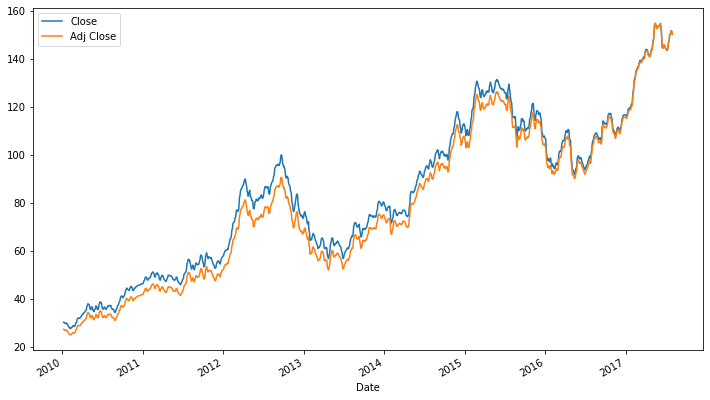

In [190]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

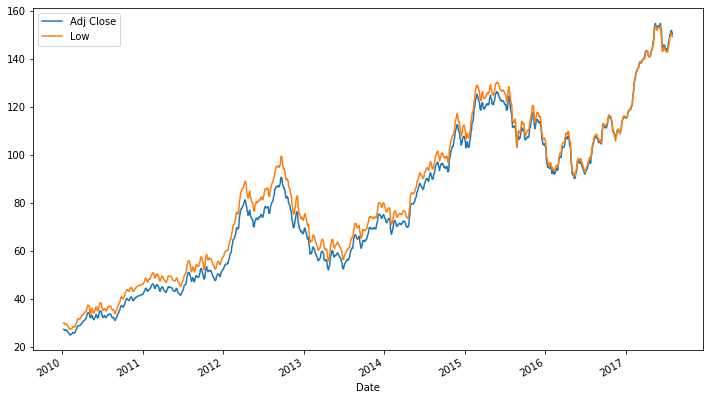

In [191]:
# ssalgado
aapl.rolling(5)[['Adj Close', 'Low']].mean().plot();

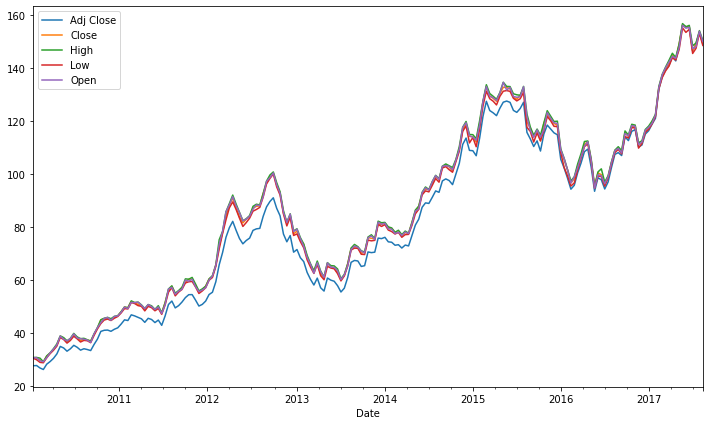

In [192]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

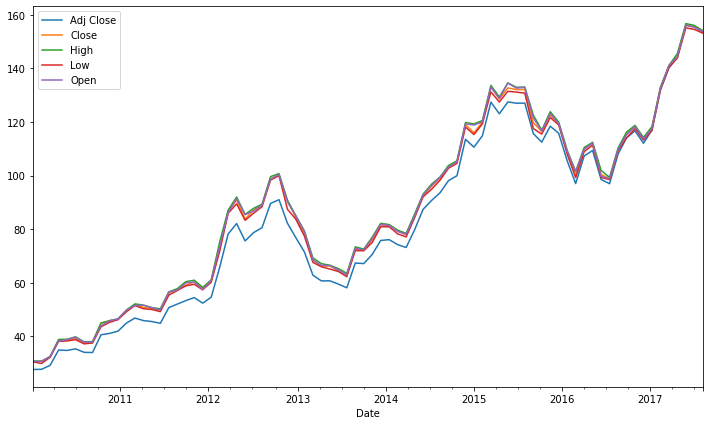

In [193]:
# ssalgado
aapl.drop('Volume', axis=1).resample('5W').max().plot();

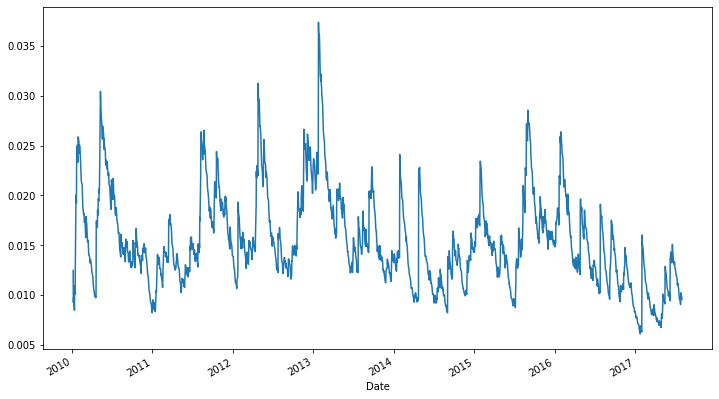

In [194]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

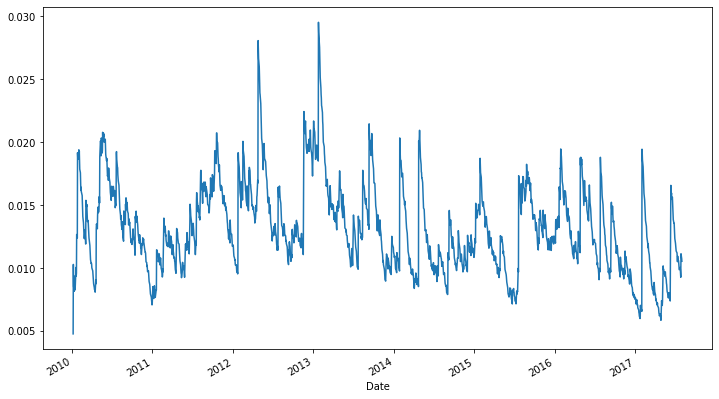

In [195]:
# ssalgado
aapl['High'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [196]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [197]:

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [213]:
#ssalgado
adq = pd.read_csv('sample_data/PLAN_ANUAL_DE_ADQUISIONES_A_O_2021.csv')
adq.head()

,AÑO,CODIGOS UNSPSC,DESCRIPCION,FECHA ESTIMADA DE INICIO DE PROCESOS DE SELECCIÓN,DURACION ESTIMADA DEL CONTRATO,MODALIDAD DE SELECCIÓN,FUENTE DE LOS RECURSOS,VALOR TOTAL ESTIMADO,VALOR ESTIMADO EN LA VIGENCIA ACTUAL,¿SE REQUIERE VIGENCIAS FUTURAS?,ESTADO DE SOLICITUD DE VIGENCIAS FUTURAS,DATOS DE CONTACTO DEL RESPONSABLE
0,2021,42143100,PRESTACION DE LOS SERVICIOS ESPECIALIZADOS DE...,Enero,8,REGIMEN_ESPECIAL,Recursos propios,107120000,107120000,False,NaN,NaN
1,2021,80111701,"PRESTACION DE SERVICIOS PERSONALES, TECNICOS, ...",Enero,8,CONTRATACION_DIRECTA,Recursos propios,5484478537,5484478537,False,NaN,NaN
2,2021,26141701,SUMINISTRO DEL SERVICIO DE DOSIMETRIA PERSONAL...,Enero,12,REGIMEN_ESPECIAL,Recursos propios,11124000,11124000,False,NaN,NaN
3,2021,85101600,"PRESTACION DE SERVICIOS PERSONALES, TECNICOS, ...",Enero,7,CONTRATACION_DIRECTA,Recursos propios,1169659988,1169659988,False,NaN,NaN
4,2021,92121701,COMPRA DISCOS DUROS ESTADO SOLIDO PARA SERVIDORES,Febrero,1,REGIMEN_ESPECIAL,Recursos propios,20000000,20000000,False,NaN,NaN


In [205]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [222]:
#ssalgado
adq.dtypes

AÑO                                                    int64
CODIGOS UNSPSC                                         int64
DESCRIPCION                                           object
FECHA ESTIMADA DE INICIO DE PROCESOS DE SELECCIÓN     object
DURACION ESTIMADA DEL CONTRATO                         int64
MODALIDAD DE SELECCIÓN                                object
FUENTE DE LOS RECURSOS                                object
VALOR TOTAL ESTIMADO                                   int64
VALOR ESTIMADO EN LA VIGENCIA ACTUAL                   int64
¿SE REQUIERE VIGENCIAS  FUTURAS?                        bool
ESTADO DE SOLICITUD DE VIGENCIAS FUTURAS             float64
DATOS DE CONTACTO DEL RESPONSABLE                    float64
dtype: object

In [223]:
# ssalgado
adq.columns=['anio','codigo','descripcion','fecha_ini','duracion','modalidad','fuente_rec','val_total','val_vig_act', 'vig_fut','estado','responsable']
adq.dtypes


anio             int64
codigo           int64
descripcion     object
fecha_ini       object
duracion         int64
modalidad       object
fuente_rec      object
val_total        int64
val_vig_act      int64
vig_fut           bool
estado         float64
responsable    float64
dtype: object

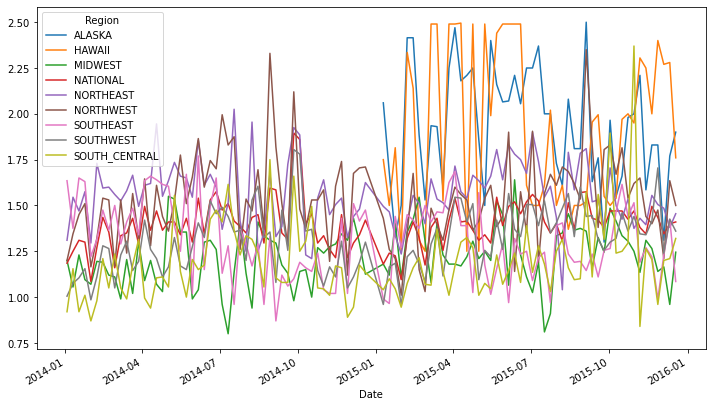

In [221]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

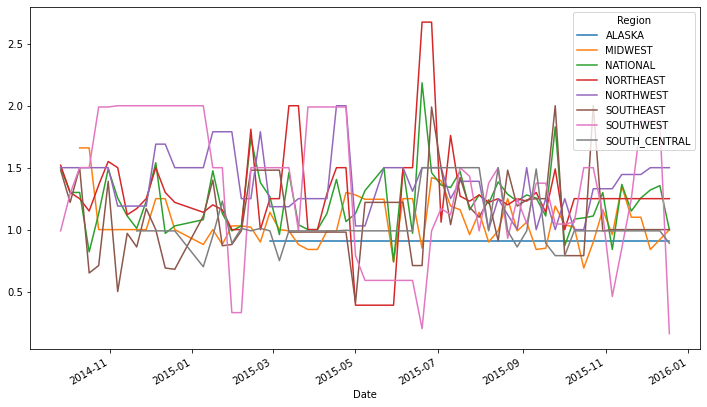

In [235]:
# ssalgado
greenskin = avocados[avocados.Variety == 'GREENSKIN']
greenskin.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

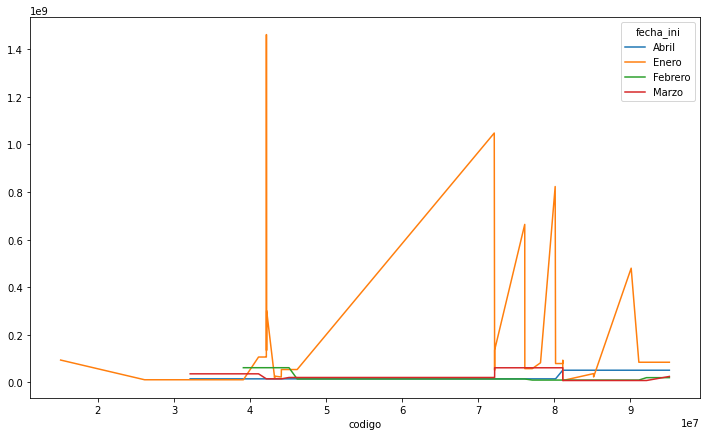

In [232]:
#ssalgado
modalidad2 = adq[adq.modalidad == 'REGIMEN_ESPECIAL']
modalidad2.groupby(['codigo', 'fecha_ini'])['val_total'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

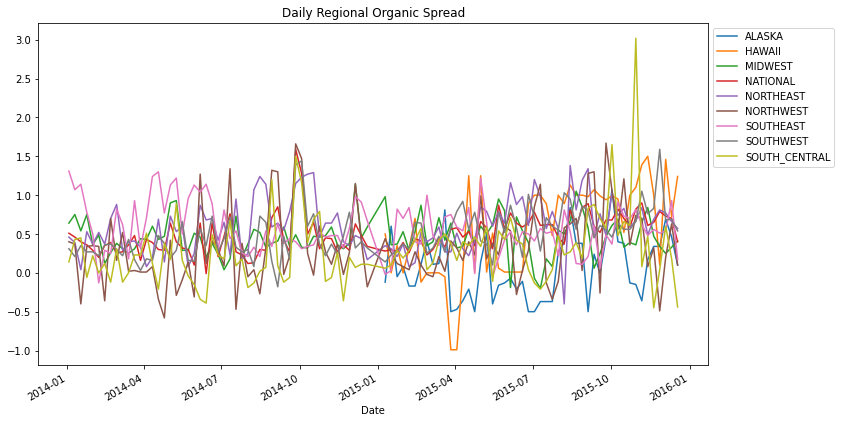

In [206]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

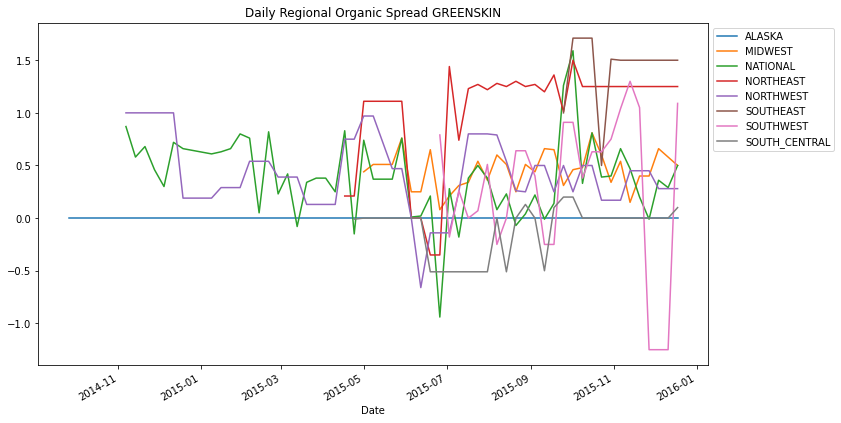

In [240]:
# ssalgado
organic_spread_by_region(greenskin).plot();
plt.gca().set_title("Daily Regional Organic Spread GREENSKIN");
plt.legend(bbox_to_anchor=(1, 1));

In [237]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [238]:
#ssalgado
sp_corr_greenskin = organic_spread_by_region(greenskin).corr()
sp_corr_greenskin

Region,ALASKA,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,
ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIDWEST,NaN,1.000000,0.326341,0.307174,0.289433,0.041748,-0.346672,0.166863
NATIONAL,NaN,0.326341,1.000000,0.417789,0.299378,0.021097,0.250812,0.401773
NORTHEAST,NaN,0.307174,0.417789,1.000000,0.400814,0.434013,-0.149993,0.248797
NORTHWEST,NaN,0.289433,0.299378,0.400814,1.000000,0.257435,-0.111115,0.004146
SOUTHEAST,NaN,0.041748,0.021097,0.434013,0.257435,1.000000,-0.090884,-0.081374
SOUTHWEST,NaN,-0.346672,0.250812,-0.149993,-0.111115,-0.090884,1.000000,0.179237
SOUTH_CENTRAL,NaN,0.166863,0.401773,0.248797,0.004146,-0.081374,0.179237,1.000000


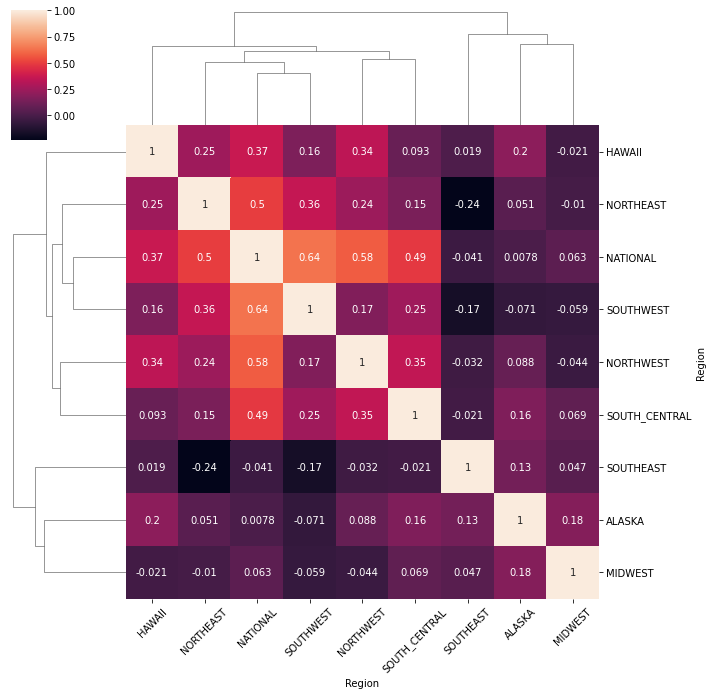

In [211]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

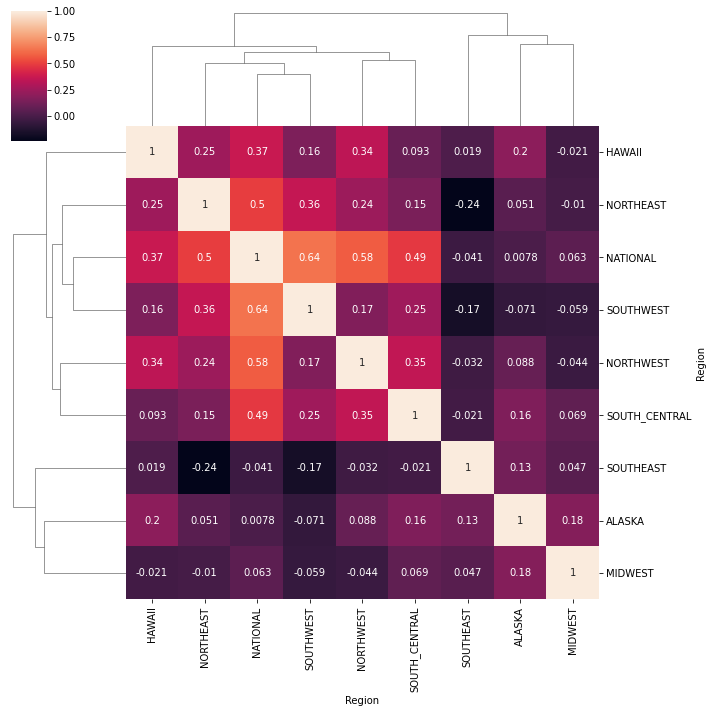

In [241]:
# ssalgado
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[3]
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!